# **Jacob Shearer - Excercise set 6**

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Question 1:**

1.9126748577245383e-37
1.3370425869574915e-06
5.510890224226373e-05
0.0006605069904361445
0.0027103213459093727
0.0006199160200480525
0.6745540246812008
-0.6010199578588143
1.82935676293375
0.9382087525184463
0.8178053586167349
1.1218253693512965
1.0476074806467566
1.020889212658963
0.9899258893153287
0.994792351362087
1.002627335895562
0.9986922295643083
0.99934341370492
0.9996710306025927


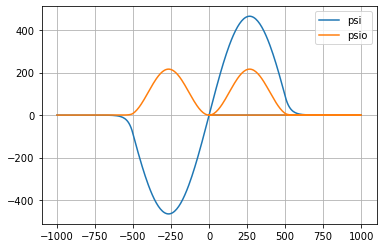

[[-1.00000000e+03 -9.93333333e+02 -9.86666667e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -6.62785919e-06 -1.35410547e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[-0.00096519 -0.00096519 -0.00096519 ... -0.00096519 -0.00096519
 -0.00096519]


In [3]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

# This assumes hbar = 1, m = 1, 

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-8                      # very small interval to stop bisection
ul    = np.zeros(1501)
ur    = np.zeros(1501)
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                        # k**2 right wavefunc  
n     = 1501
nl    = n
nr    = n
m     = 5                                           # plot every 5 points
imax  = 100 
xl0   = -1000;   xr0   =  1000                    # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -0.01; amax  = -0.00085                            # root limits
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 500                                                    # match point
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=500):
        v = -0.001                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = e-V(xl)
       k2r[i] = e-V(xr)

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale
for i  in range (0,nl): ul[i] = fact*ul[i]
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2                                     
    for i in range(0,n):  
        k2l[i] = k2l[i] + e-e1             
        k2r[i] = k2r[i] + e-e1
        nl = im+2
        nr = n-im+1;
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    print(fact)
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1], label='psi')
plt.plot(psio[0], psio[1], label='psio')
plt.legend()
plt.grid()
plt.show()
print(psi)
print(k2l)